<a href="https://colab.research.google.com/github/yjyuwisely/AI_project_mastery_bootcamp/blob/main/AI_Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

위키피디아의 Artificial Intelligence (인공지능) 웹페이지의 텍스트 정보를 바탕으로 뇌 모양의 이미지에 워드 클라우드를 생성했다.

In [ ]:
import matplotlib.font_manager as fm # 폰트 관련 용도
import matplotlib.pyplot as plt      # 그래프 그리는 용도
import numpy as np  # Import numpy and assign it to the alias 'np'

위키피디아에서 정보를 가져와서 TXT 파일로 저장했다.
https://en.wikipedia.org/wiki/Artificial_intelligence

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

# Get the webpage content
# 웹 페이지 콘텐츠 가져오기
url = "https://en.wikipedia.org/wiki/Artificial_intelligence"
response = requests.get(url)

# Parse HTML
# HTML 파싱하기
soup = BeautifulSoup(response.content, 'html.parser')

# Remove unwanted elements
# 필요 없는 요소 제거하기
for unwanted in soup.find_all(['script', 'style', 'sup', 'table', 'footer', 'nav']):
    unwanted.decompose()

# Extract main content
# 주요 콘텐츠 추출하기
main_content = soup.find(id='mw-content-text')

# Get text and clean it
# 텍스트 추출 및 정리하기
if main_content:
    text = main_content.get_text()

    # Clean the text
    # 텍스트 정리하기
    text = re.sub(r'\[.*?\]', '', text)  # Remove citations [1], [2], etc.
    # 각주 제거 [1], [2] 등
    text = re.sub(r'\n+', '\n', text)    # Remove multiple newlines
    # 여러 개의 줄바꿈 문자 제거
    text = re.sub(r'\s+', ' ', text)     # Remove multiple spaces
    # 여러 개의 공백 제거

    # Save to file
    # 파일로 저장하기
    with open('ai_wiki.txt', 'w', encoding='utf-8') as f:
        f.write(text)

print("Text has been saved to ai_wiki.txt")  # 파일 저장 완료 메시지 출력

Text has been saved to ai_wiki.txt


In [ ]:
### 데이터 읽기
text = open("ai_wiki.txt").read()
text

'Intelligence of machines "AI" redirects here. For other uses, see AI (disambiguation), Artificial intelligence (disambiguation), and Intelligent agent. Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals. Such machines may be called AIs. Some high-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); interacting via human speech (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., ChatGPT, and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perce

In [ ]:
!pip install konlpy

In [ ]:
import nltk
from konlpy.tag import Kkma      ### 꼬꼬마
from konlpy.tag import Hannanum  ### 한나눔

### wordcloud와 이미지 표시
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [ ]:
### 불용어 단어 추가
x_words = set(STOPWORDS)
x_words.add("said")
x_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [ ]:
## 집합 확인
s2 = set([1,2,3,4,5,1,2])
s2

{1, 2, 3, 4, 5}

In [ ]:
### wordcloud의 불용어 단어 확인
print(type(STOPWORDS) )
print(len(STOPWORDS), STOPWORDS)

<class 'set'>
192 {"doesn't", "he'll", 'do', 'get', "weren't", 'the', 'you', 'she', 'be', "mustn't", 'herself', "we'll", "you're", 'off', 'also', 'did', 'if', 'too', 'her', "don't", 'ever', 'such', 'other', 'out', "didn't", 'its', 'with', 'have', "hasn't", "when's", 'yourselves', "it's", 'or', 'who', "you'll", 'for', 'but', 'r', "you've", "we've", 'on', 'here', 'could', 'over', "i'd", 'into', 'so', "they'd", 'i', 'down', 'just', "here's", 'about', "where's", 'he', 'because', 'an', 'again', "haven't", "they're", "what's", 'it', 'which', 'them', 'my', 'before', "she'll", "that's", 'theirs', 'there', "shouldn't", 'themselves', 'than', 'few', "shan't", 'after', 'been', 'otherwise', 'should', 'each', "i'm", "wouldn't", 'had', 'hence', "i've", "let's", "they'll", 'below', 'his', "we'd", 'both', 'yours', 'being', 'am', "i'll", 'of', 'were', 'www', 'more', 'ought', "he's", 'most', 'doing', "he'd", "how's", 'com', 'what', 'very', 'k', 'these', 'this', 'no', 'yourself', 'their', 'our', "aren't",

이미지 출처: https://pixabay.com/vectors/brain-ai-artificial-intelligence-8764403/

이미지를 그림판으로 배경을 하얗게 처리했다.

In [ ]:
# 이미지를 불러와 numpy 자료형 형으로 변경.
# alice_mask = np.array(Image.open("alice_color.png"))
brain_mask = np.array(Image.open("brain.png"))
brain_mask[0]   # 이미지 배열화된 내용 하나의 정보 확인

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]], dtype=uint8)

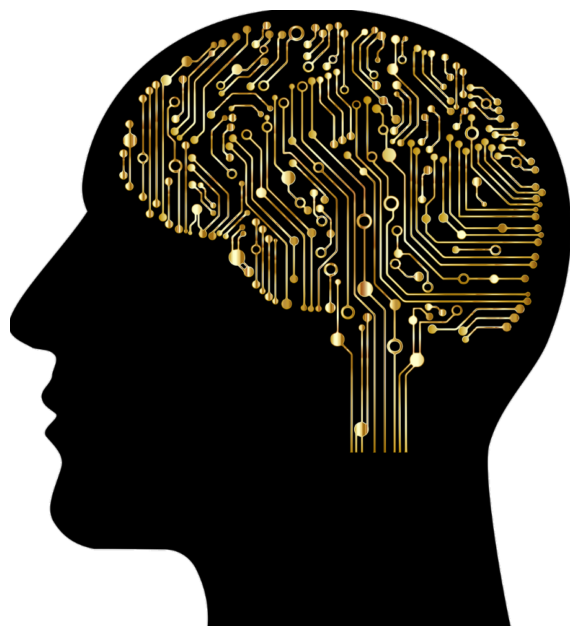

In [ ]:
plt.figure(figsize=(15,8))  # 크기
plt.imshow(brain_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')    # x, y축 없음.
plt.show()

In [ ]:
### 워드 클라우드 표현을 위한 데이터 생성
wc = WordCloud( background_color='white',    # 배경색
                max_words=2000,              # 최대 표시 단어
                mask=brain_mask,             # 마스크 이미지 정보
                contour_width=3,             # 외곽선
                contour_color="steelblue" )  # 외곽선 색
wc.generate(text)

word_list = list( wc.words_.keys() )
word_list[0:10]

['AI',
 'original',
 'artificial intelligence',
 'Russell Norvig',
 'Archived',
 'human',
 'May',
 'problem',
 'machine',
 'use']

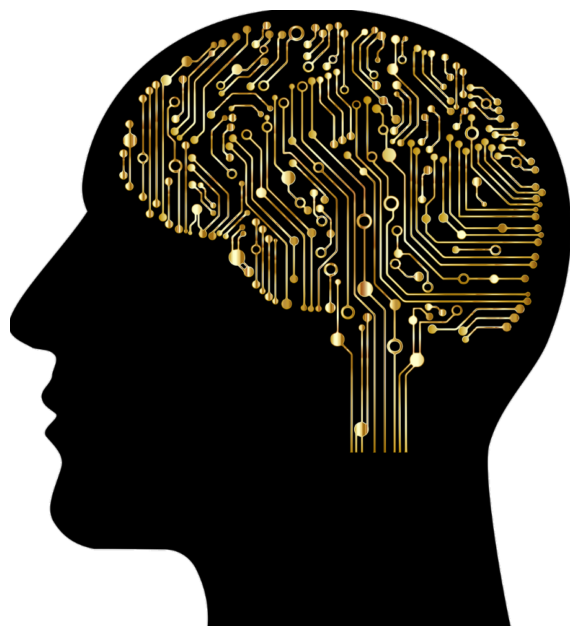

In [ ]:
plt.figure(figsize=(15,8))  # 크기
plt.imshow(brain_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

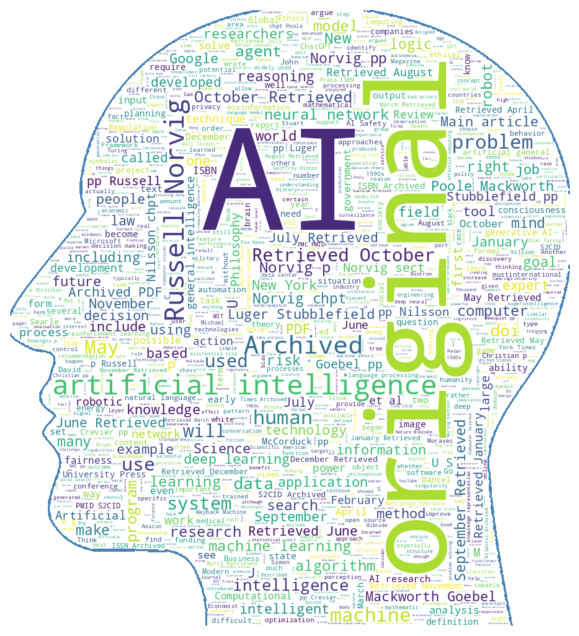

In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()